In [21]:
import matplotlib.pyplot as plt
import re

# Grafico comparativo de valores K

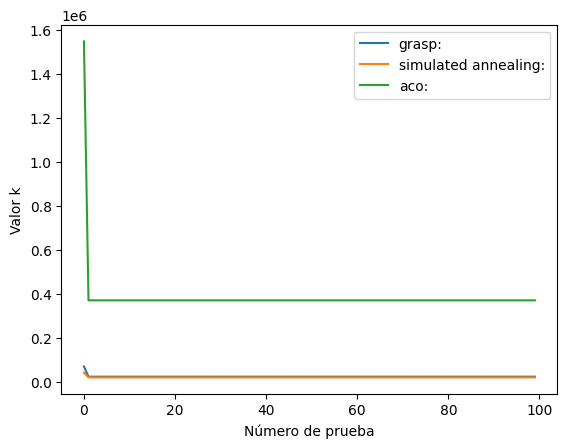

In [22]:
# Leer el archivo "test_data_k"
nombre_archivo = "test_data_k.txt"

with open(nombre_archivo, 'r') as archivo:
    lineas = archivo.readlines()

# Crear un diccionario para almacenar los datos de cada algoritmo
datos_algoritmos = {}

algoritmo_actual = None
datos_actual = []

for linea in lineas:
    linea = linea.strip()

    if linea:
        if re.match(r"\d+\.\d+ [kKmM] allocations", linea):
            valor, unidad = re.findall(r"(\d+\.\d+) ([kKmM]) allocations", linea)[0]
            valor = float(valor)
            
            if unidad.lower() == "k":
                valor *= 1000
            elif unidad.lower() == "m":
                valor *= 1000000
            
            datos_actual.append(valor)
        else:
            algoritmo_actual = linea
            datos_actual = []
    else:
        if algoritmo_actual:
            if algoritmo_actual in datos_algoritmos:
                datos_algoritmos[algoritmo_actual].extend(datos_actual)
            else:
                datos_algoritmos[algoritmo_actual] = datos_actual

# Crear un gráfico por cada algoritmo
for algoritmo, datos in datos_algoritmos.items():
    plt.plot(datos, label=algoritmo)

# Configurar el gráfico
plt.xlabel("Número de prueba")
plt.ylabel("Valor k")
plt.legend()

# Mostrar el gráfico
plt.show()

# Grafico comparativo de valores de recorrido

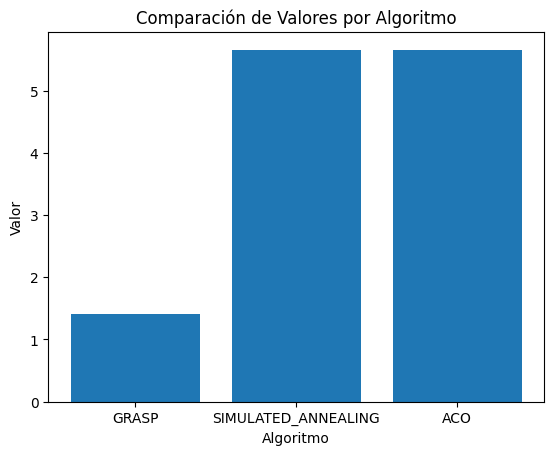

In [23]:
# Leer el archivo
nombre_archivo = "test_data_recorrido.txt"

with open(nombre_archivo, 'r') as archivo:
    lineas = archivo.readlines()

# Crear un diccionario para almacenar los datos de cada algoritmo
datos_algoritmos = {}

# Variables auxiliares para almacenar el algoritmo actual
algoritmo_actual = None
datos_actual = []

# Variable auxiliar para ignorar la primera línea después de un salto de línea
ignorar_siguiente_linea = False

# Recorrer las líneas del archivo
for i, linea in enumerate(lineas):
    linea = linea.strip()

    # Ignorar la primera línea después de un salto de línea
    if ignorar_siguiente_linea:
        ignorar_siguiente_linea = False
        continue

    # Ignorar la primera línea del archivo
    if i == 0:
        continue

    # Obtener el algoritmo y el valor numérico de la línea
    if linea.startswith("GRASP:"):
        algoritmo_actual = "GRASP"
        valor = linea.split(":")[1].strip()
        datos_actual.append(float(valor))
    elif linea.startswith("SA:"):
        algoritmo_actual = "SIMULATED_ANNEALING"
        valor = linea.split(":")[1].strip()
        datos_actual.append(float(valor))
    elif linea.startswith("ACO:"):
        algoritmo_actual = "ACO"
        valor = linea.split(":")[1].strip()
        datos_actual.append(float(valor))

    # Almacenar los datos del algoritmo actual en el diccionario
    if algoritmo_actual and datos_actual:
        if algoritmo_actual in datos_algoritmos:
            datos_algoritmos[algoritmo_actual].extend(datos_actual)
        else:
            datos_algoritmos[algoritmo_actual] = datos_actual
        algoritmo_actual = None
        datos_actual = []

    # Verificar si la siguiente línea debe ser ignorada
    if not linea:
        ignorar_siguiente_linea = True

# Obtener los nombres de los algoritmos y los datos de valor
algoritmos = list(datos_algoritmos.keys())
valores = list(datos_algoritmos.values())

# Crear un gráfico de barras para los valores
fig, ax = plt.subplots()
ax.bar(algoritmos, [sum(vals) / len(vals) for vals in valores])

# Configurar el gráfico
ax.set_xlabel("Algoritmo")
ax.set_ylabel("Valor")
ax.set_title("Comparación de Valores por Algoritmo")

# Mostrar el gráfico
plt.show()

# Grafico comparativo de valores de tiempo de ejecucion

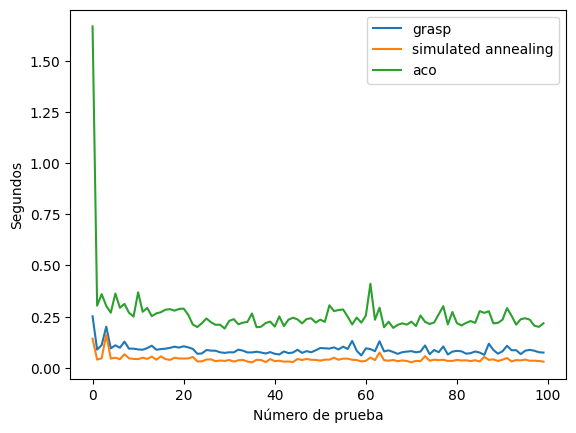

In [24]:
# Leer el archivo "test_data_seconds.txt"
nombre_archivo = "test_data_seconds.txt"

with open(nombre_archivo, 'r') as archivo:
    lineas = archivo.readlines()

# Extraer los valores de segundos para cada algoritmo
datos_algoritmos = {}

for linea in lineas:
    algoritmo, segundos = linea.strip().split(":")
    segundos = [float(segundo.split()[0]) for segundo in segundos.split(",")]
    datos_algoritmos[algoritmo] = segundos

# Crear un gráfico de comparación
for algoritmo, segundos in datos_algoritmos.items():
    plt.plot(segundos, label=algoritmo)

# Configurar el gráfico
plt.xlabel("Número de prueba")
plt.ylabel("Segundos")
plt.legend()

# Mostrar el gráfico
plt.show()

# Grafico comparativo de valores de porcentaje de recursos

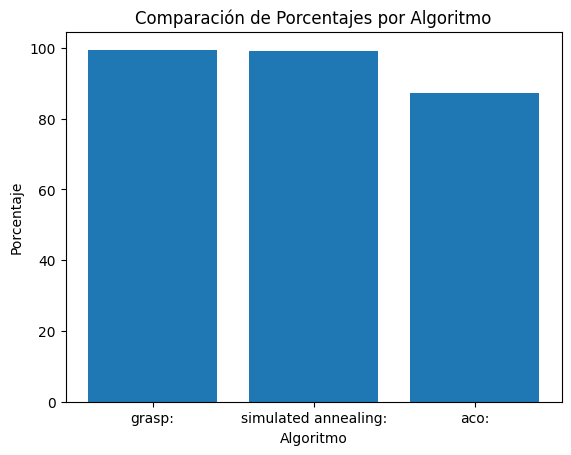

In [25]:
# Leer el archivo "test_data_porc.txt"
nombre_archivo = "test_data_porc.txt"

with open(nombre_archivo, 'r') as archivo:
    lineas = archivo.readlines()

# Crear un diccionario para almacenar los datos de cada algoritmo
datos_algoritmos = {}

algoritmo_actual = None
datos_actual = []

for linea in lineas:
    linea = linea.strip()

    if linea:
        if linea.startswith("Porcentaje:"):
            porcentaje = float(linea.split(":")[1].strip())
            datos_actual.append(porcentaje)
        else:
            algoritmo_actual = linea
            datos_actual = []
    else:
        if algoritmo_actual:
            if algoritmo_actual in datos_algoritmos:
                datos_algoritmos[algoritmo_actual].extend(datos_actual)
            else:
                datos_algoritmos[algoritmo_actual] = datos_actual

# Obtener los nombres de los algoritmos y los datos de porcentaje
algoritmos = list(datos_algoritmos.keys())
porcentajes = [sum(datos) / len(datos) for datos in datos_algoritmos.values()]

# Crear un gráfico de barras para los porcentajes
fig, ax = plt.subplots()
ax.bar(algoritmos, porcentajes)

# Configurar el gráfico
ax.set_xlabel("Algoritmo")
ax.set_ylabel("Porcentaje")
ax.set_title("Comparación de Porcentajes por Algoritmo")

# Mostrar el gráfico
plt.show()

# Grafico comparativo de valores de uso de memoria 

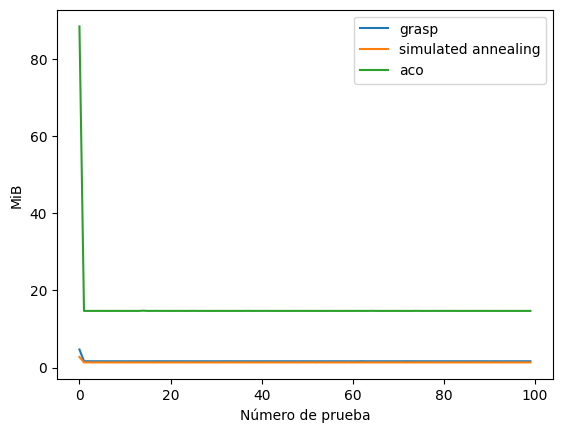

In [26]:
# Leer el archivo "test_data_mib.txt"
nombre_archivo = "test_data_mib.txt"

with open(nombre_archivo, 'r') as archivo:
    lineas = archivo.readlines()

# Extraer los valores de MiB para cada algoritmo
datos_algoritmos = {}

for linea in lineas:
    algoritmo, mibs = linea.strip().split(":")
    mibs = [float(mib.split()[0]) for mib in mibs.split(",")]
    datos_algoritmos[algoritmo] = mibs

# Crear un gráfico de comparación
for algoritmo, mibs in datos_algoritmos.items():
    plt.plot(mibs, label=algoritmo)

# Configurar el gráfico
plt.xlabel("Número de prueba")
plt.ylabel("MiB")
plt.legend()

# Mostrar el gráfico
plt.show()